## Computing density profiles

The module mda_density_profile.py defines functions to compute mass (one function) and electron (two functions) density profiles. The density profiles are usually along the normal to the bilayer and they give a quantitative estimate of the distribution of the systems components.

### Mass density profiles.

Let's start with an example of computing some mass density profiles. 

In [1]:
#Start by importing the profile density module.
import pybilt.mda_tools.mda_density_profile as dp

These tools are built to work on MDAnalysis objects, so we also need to import the MDAnalysis module.

In [2]:
#Import MDAnalysis
import MDAnalysis as mda

After computing the density profiles we will want to plot our profiles. You can design your own plots using a tool such as pyplot from matplotlib. However, we have some templated plotting functions for several of the properties in the plot_generation_functions.py module. The functions in this module use pyplot enhanced with the Seaborn module. Here we will use the template plotting function, so we'll need to import the module. 

In [3]:
%matplotlib inline

In [4]:
#Import the plotting functions.
import pybilt.plot_generation.plot_generation_functions as pgf

Now that we have imported all the modules we need, the next thing we need to do is read in our topology and trajectory files. We will do this using the MDAnalysis Universe object. If you are unfamiliar with the MDAnalysis package then https://pythonhosted.org/MDAnalysis/documentation_pages/overview.html is a good place to start. 

For this example we use a provided test bilayer system. The bilayer is composed of DOPE, POPC, and TLCL2. The topology file is a Charmm psf format and the trajectory is a ten frame DCD format file.

In [5]:
#Build the MDAnalysis universe with our topology and trajectory file.
u = mda.Universe('../pybilt/sample_bilayer/sample_bilayer.psf','../pybilt/sample_bilayer/sample_bilayer_10frames.dcd')

In [6]:
print u

<Universe with 167537 atoms and 166719 bonds>


Now that we have the MDAnalysis universe object, the next step is to make atom selections for the components we want compute profile densities for. See https://pythonhosted.org/MDAnalysis/documentation_pages/selections.html for an overview of the MDAnalysis selection syntax.

In [7]:
#Let's start with bilayer itself.
bilayer = u.select_atoms("not resname CLA and not resname TIP3 and not resname POT")

In [8]:
#Now lets select the water.
water = u.select_atoms('resname TIP3')

Now we have the MDAnalsysis Universe and some atom selections we can compute the density profiles for our selections. The basic inputs for the density profile functions are the MDAnalysis trajectory (accessed via u.trajectory) and the atom selection object.

In [9]:
# Compute the mass density profile for the bilayer.
dens_prof_bilayer = dp.mass_density_profile(u.trajectory, bilayer)

In [10]:
# Now let's compute mass density profile for water.
dens_prof_water = dp.mass_density_profile(u.trajectory, water)

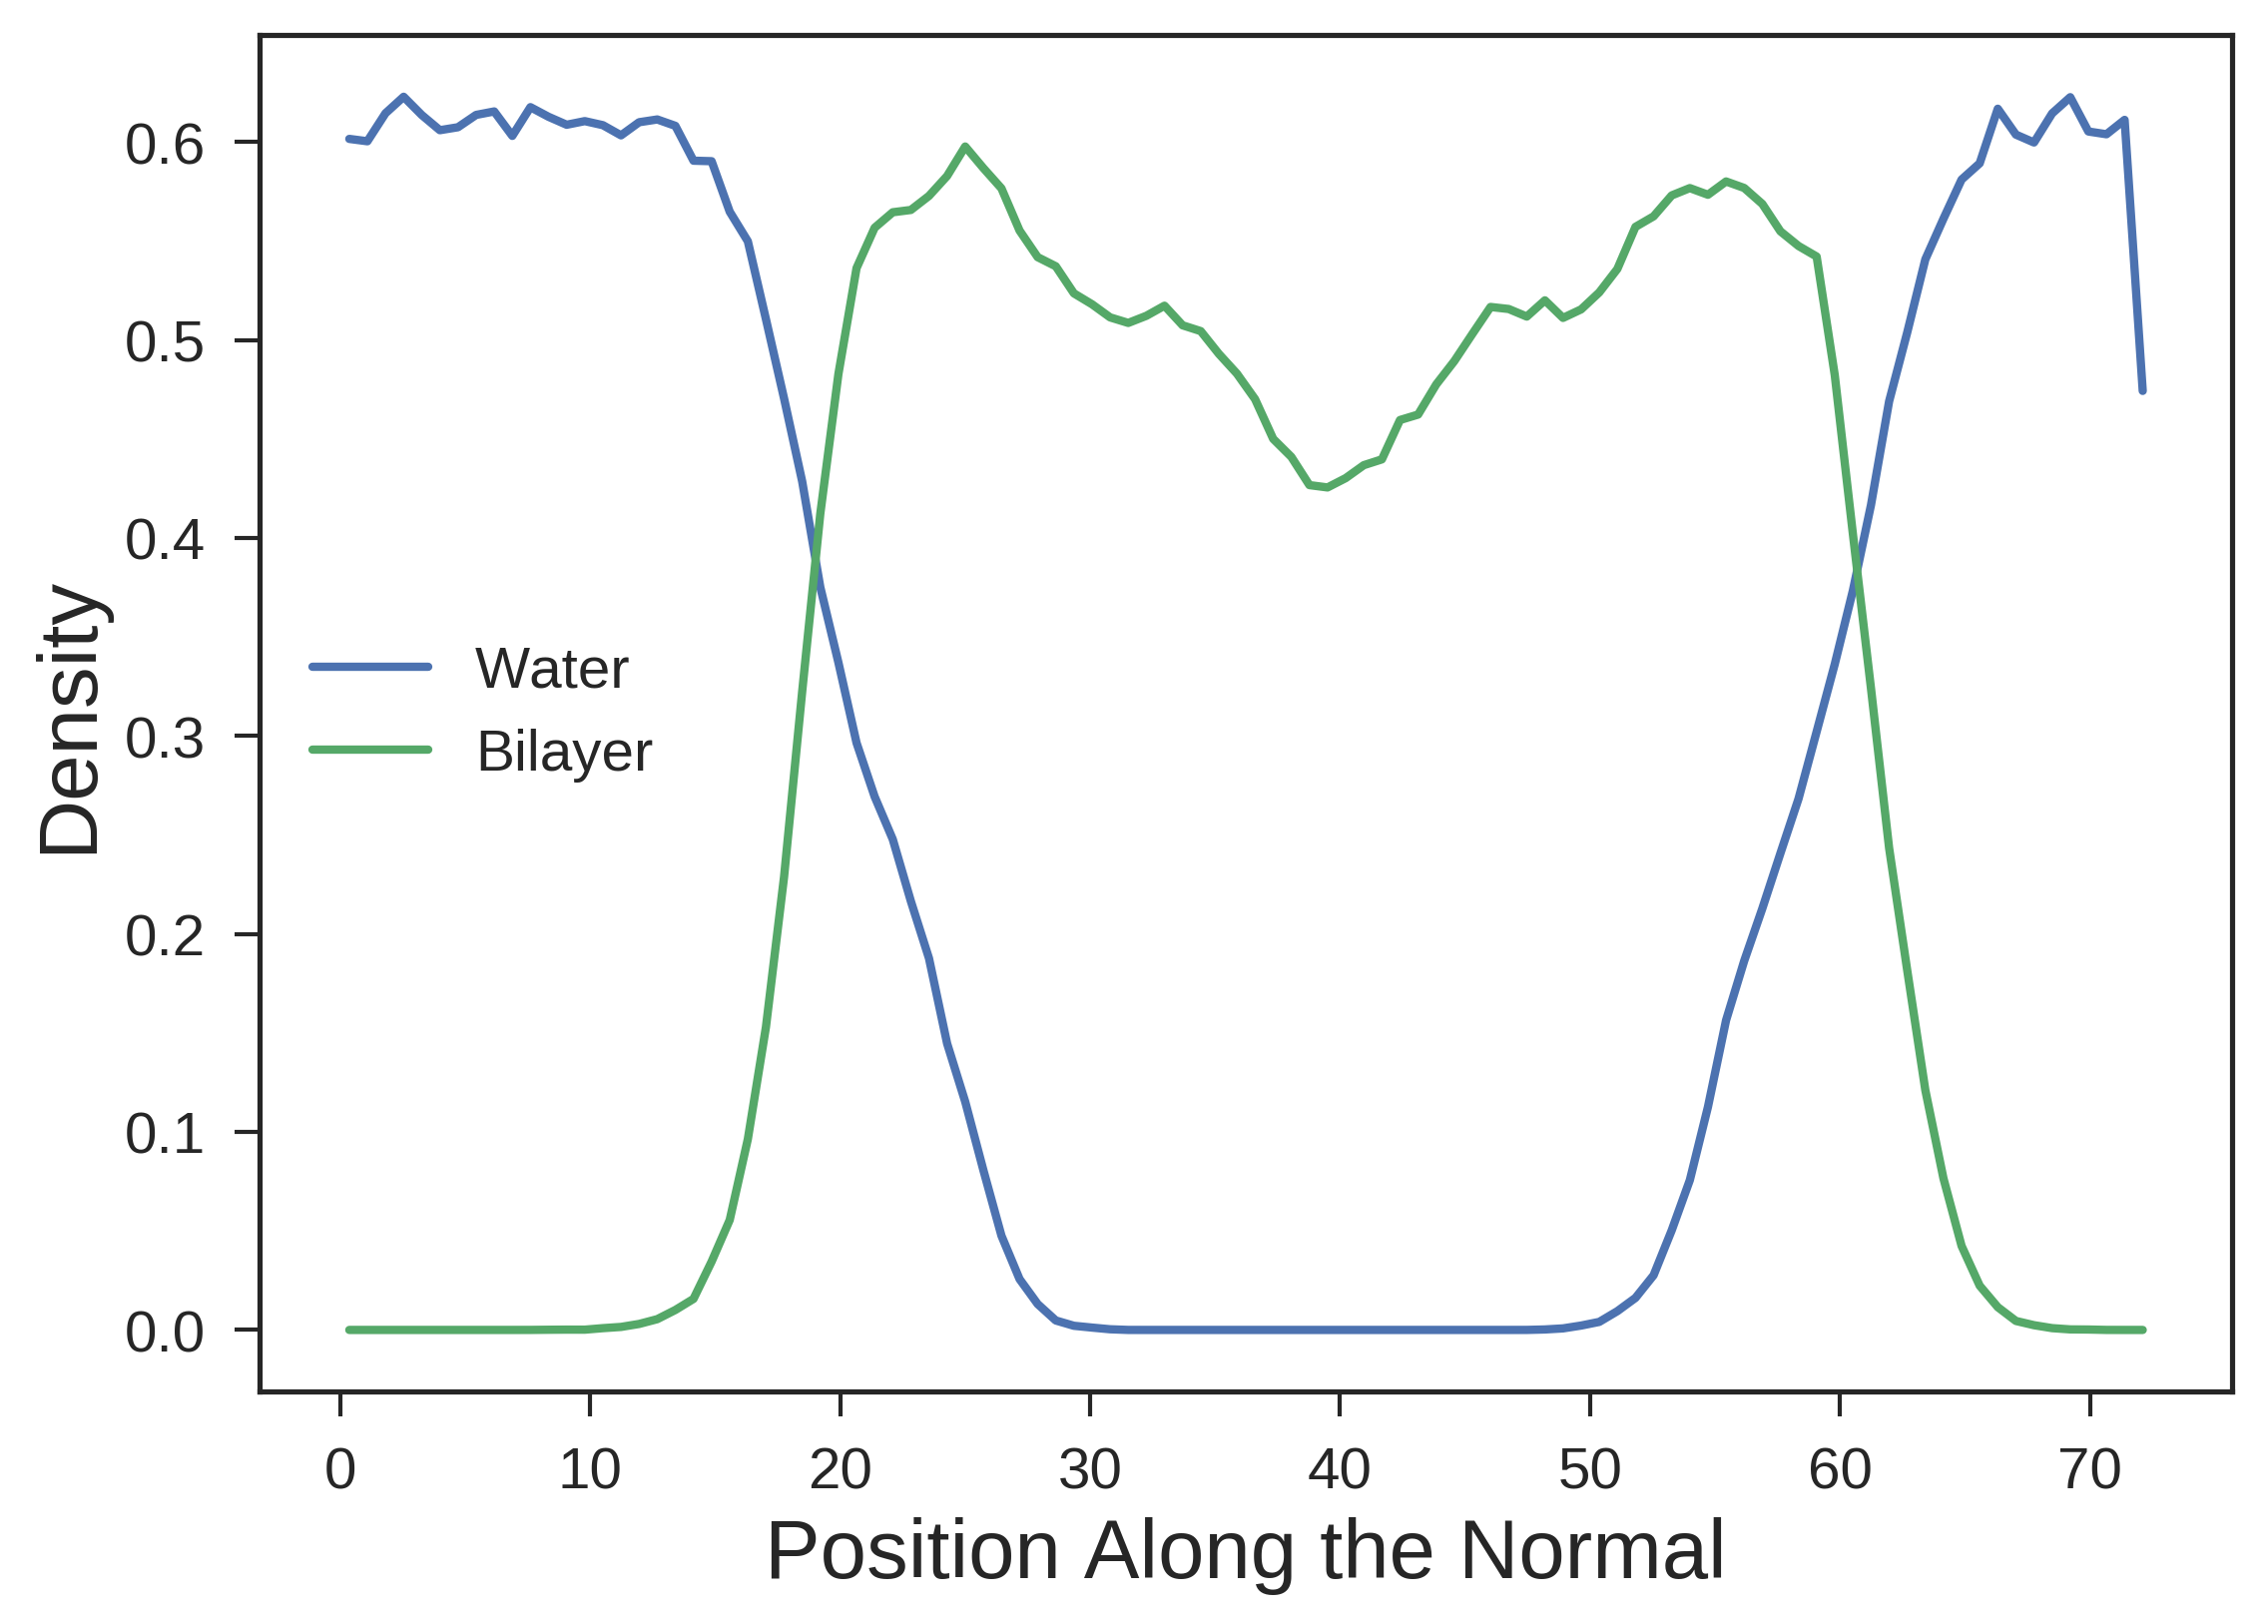

In [11]:
#Now we should plot our results.
pgf.plot_density_profile([dens_prof_water, dens_prof_bilayer], save=False, show=True, label_list=['Water', 'Bilayer'])

Now we have a nice plot of the mass density profiles. However, we often want to center our profiles around the bilayer. We do this manually in post, or we can it when computing the density profiles.  

In [12]:
# Compute the mass density profile for the bilayer. However, let's give a reference selection (i.e. the bilayer).
dens_prof_bilayer_centered = dp.mass_density_profile(u.trajectory, bilayer, refsel=bilayer)

In [13]:
# Now let's compute mass density profile for water centered on the bilayer.
dens_prof_water_centered = dp.mass_density_profile(u.trajectory, water, refsel=bilayer)

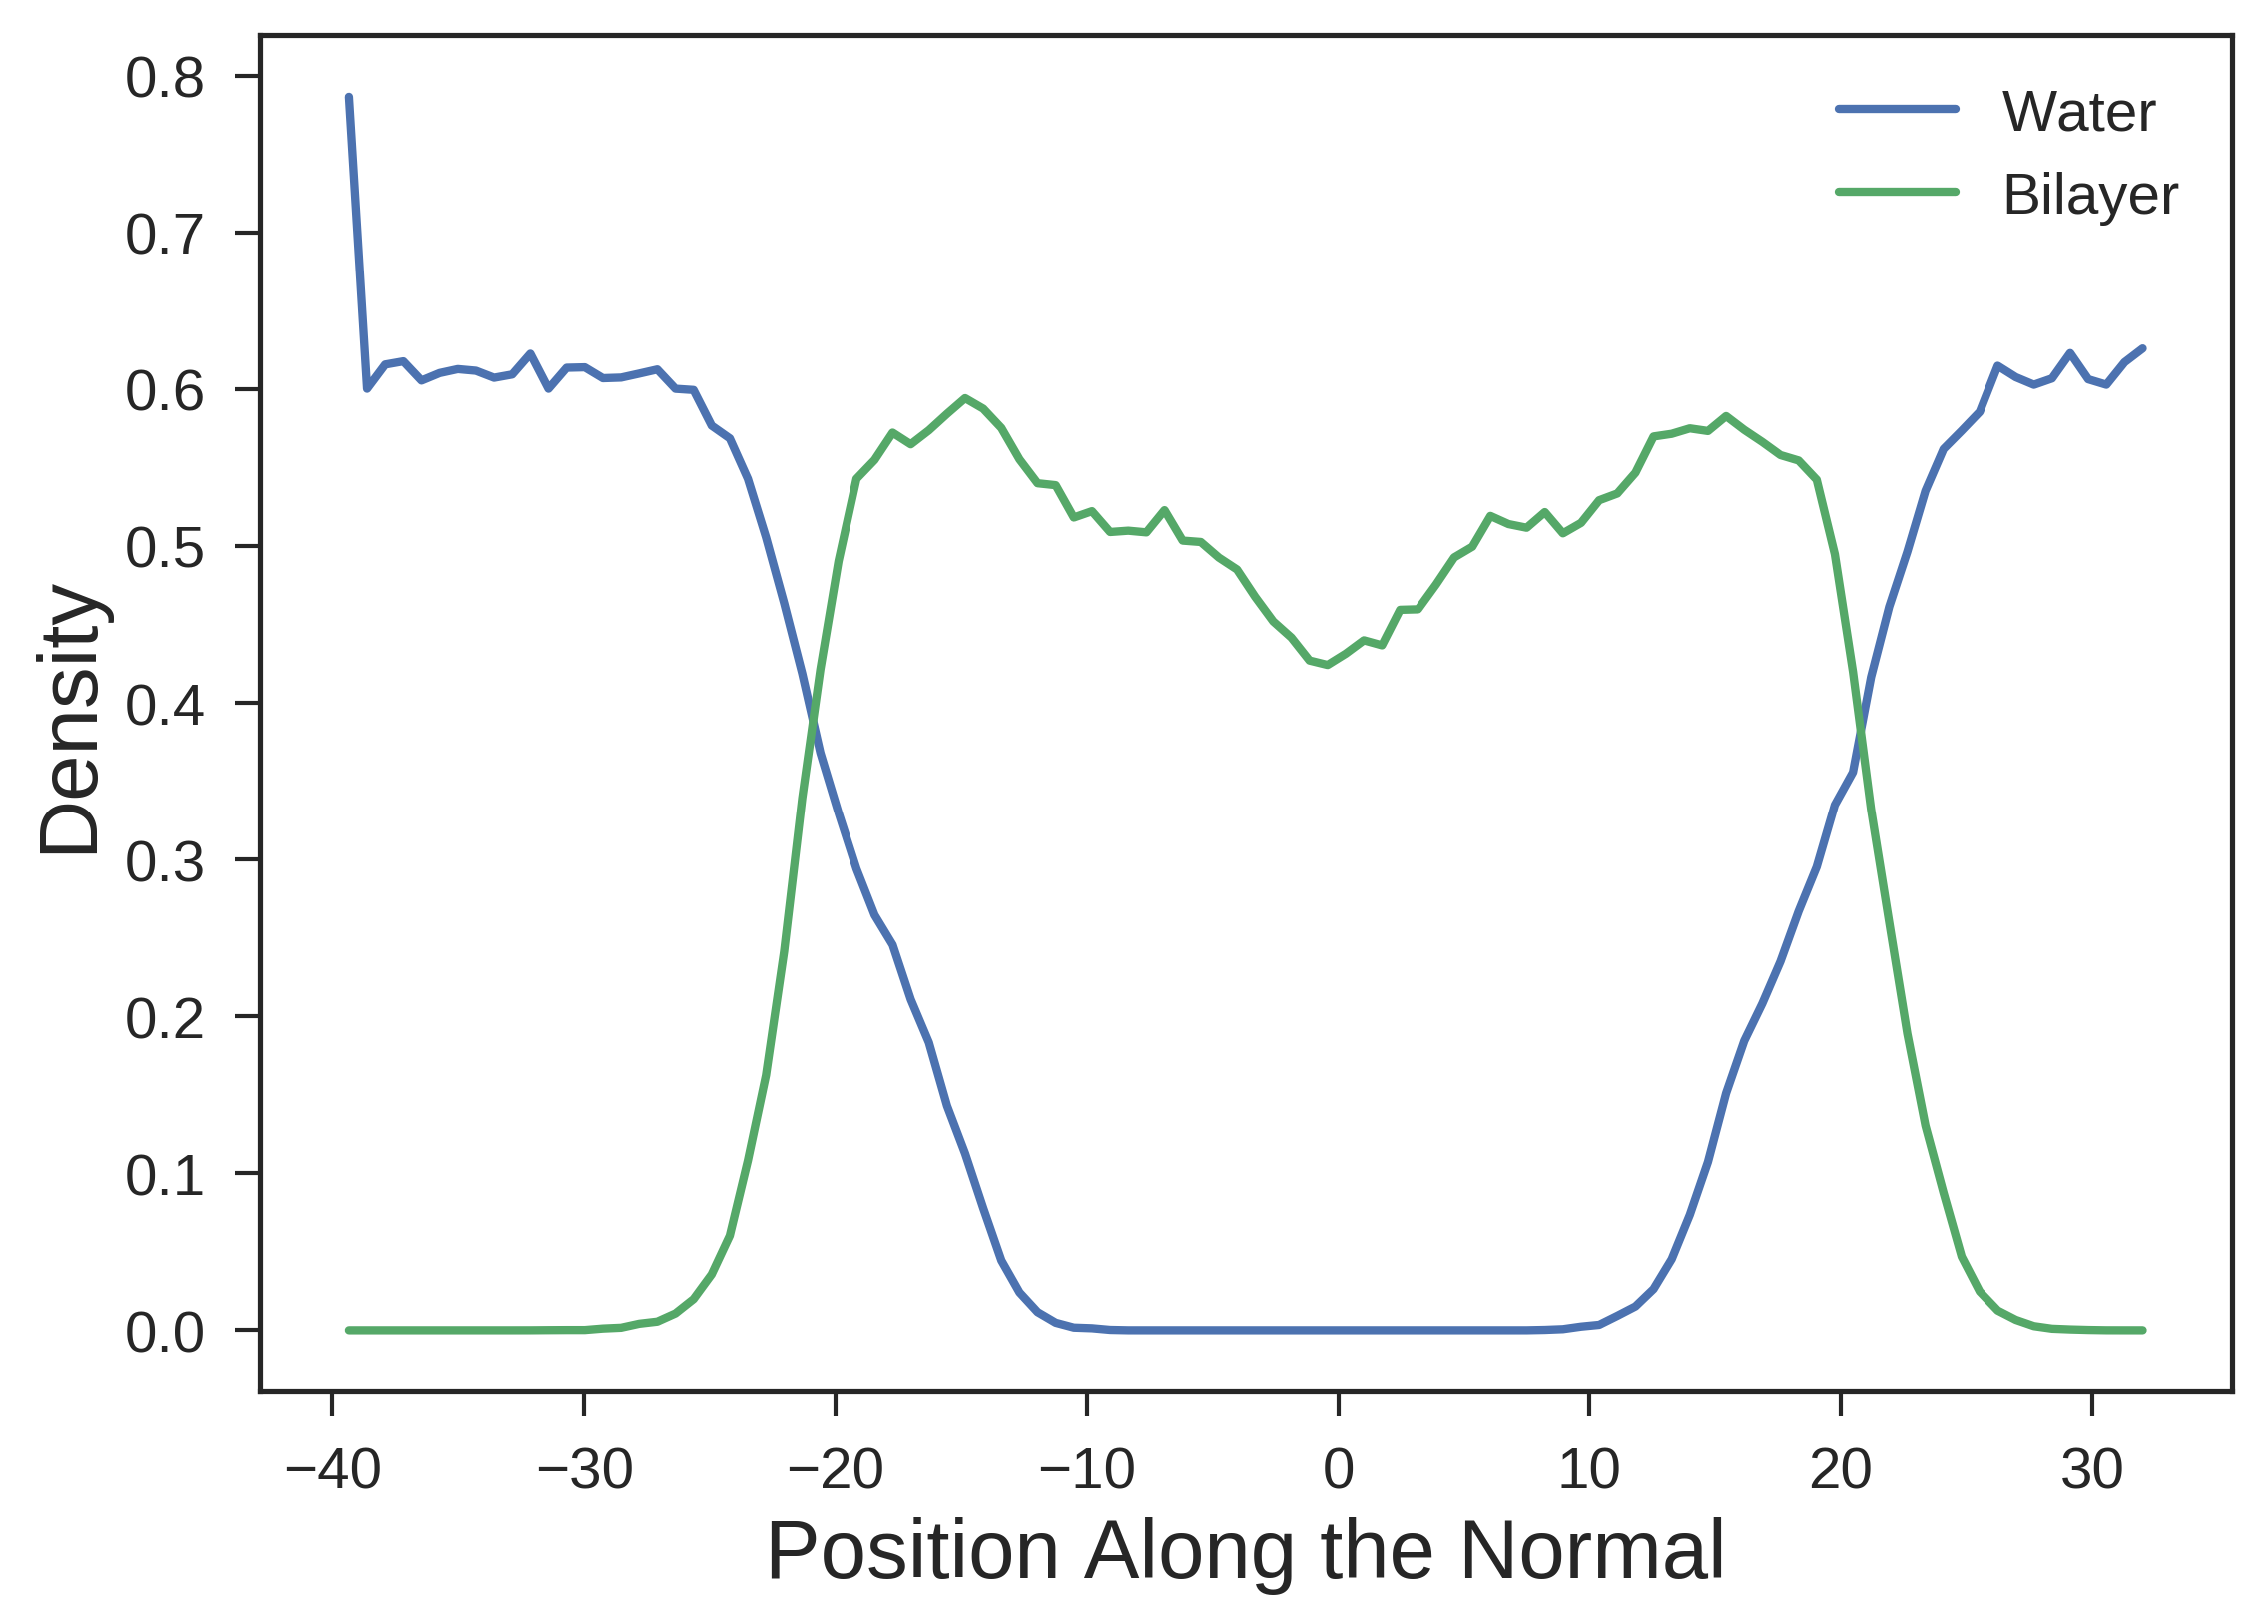

In [14]:
#Now we can plot our new results.
pgf.plot_density_profile([dens_prof_water_centered, dens_prof_bilayer_centered], save=False, show=True, label_list=['Water', 'Bilayer'])

Now we have the same density profiles, but since we used the bilayer as a reference selection the normal position is centered on the bilayer's center of mass. This gives us a nice relative position of components in reference to the bilayer.  

### Electron Density Profiles

The mda_density_profile module also provides two functions two estimate the electron density profiles of the system. The two functions are:
* electron_density_profile - models the atoms' as point charges and computes the electron density. This is the fastest of the two methods, but can result in density profiles that are not very smooth. 
* electron_denisty_profile_gaussians - models the partial charge of each atom as a Gaussian charge distribution along the normal direction centered on the atom's position. This gives a smoother and more accurate electron density, but is also the more computationally expensive of the two functions. 

Let's try computing some electron density profiles for our test bilayer system.

In [15]:
#Let's compute the point charge density for the bilayer.
edens_prof_bilayer = dp.electron_density_profile(u.trajectory, bilayer, refsel=bilayer)

In [16]:
#Now water.
edens_prof_water = dp.electron_density_profile(u.trajectory, water, refsel=bilayer)

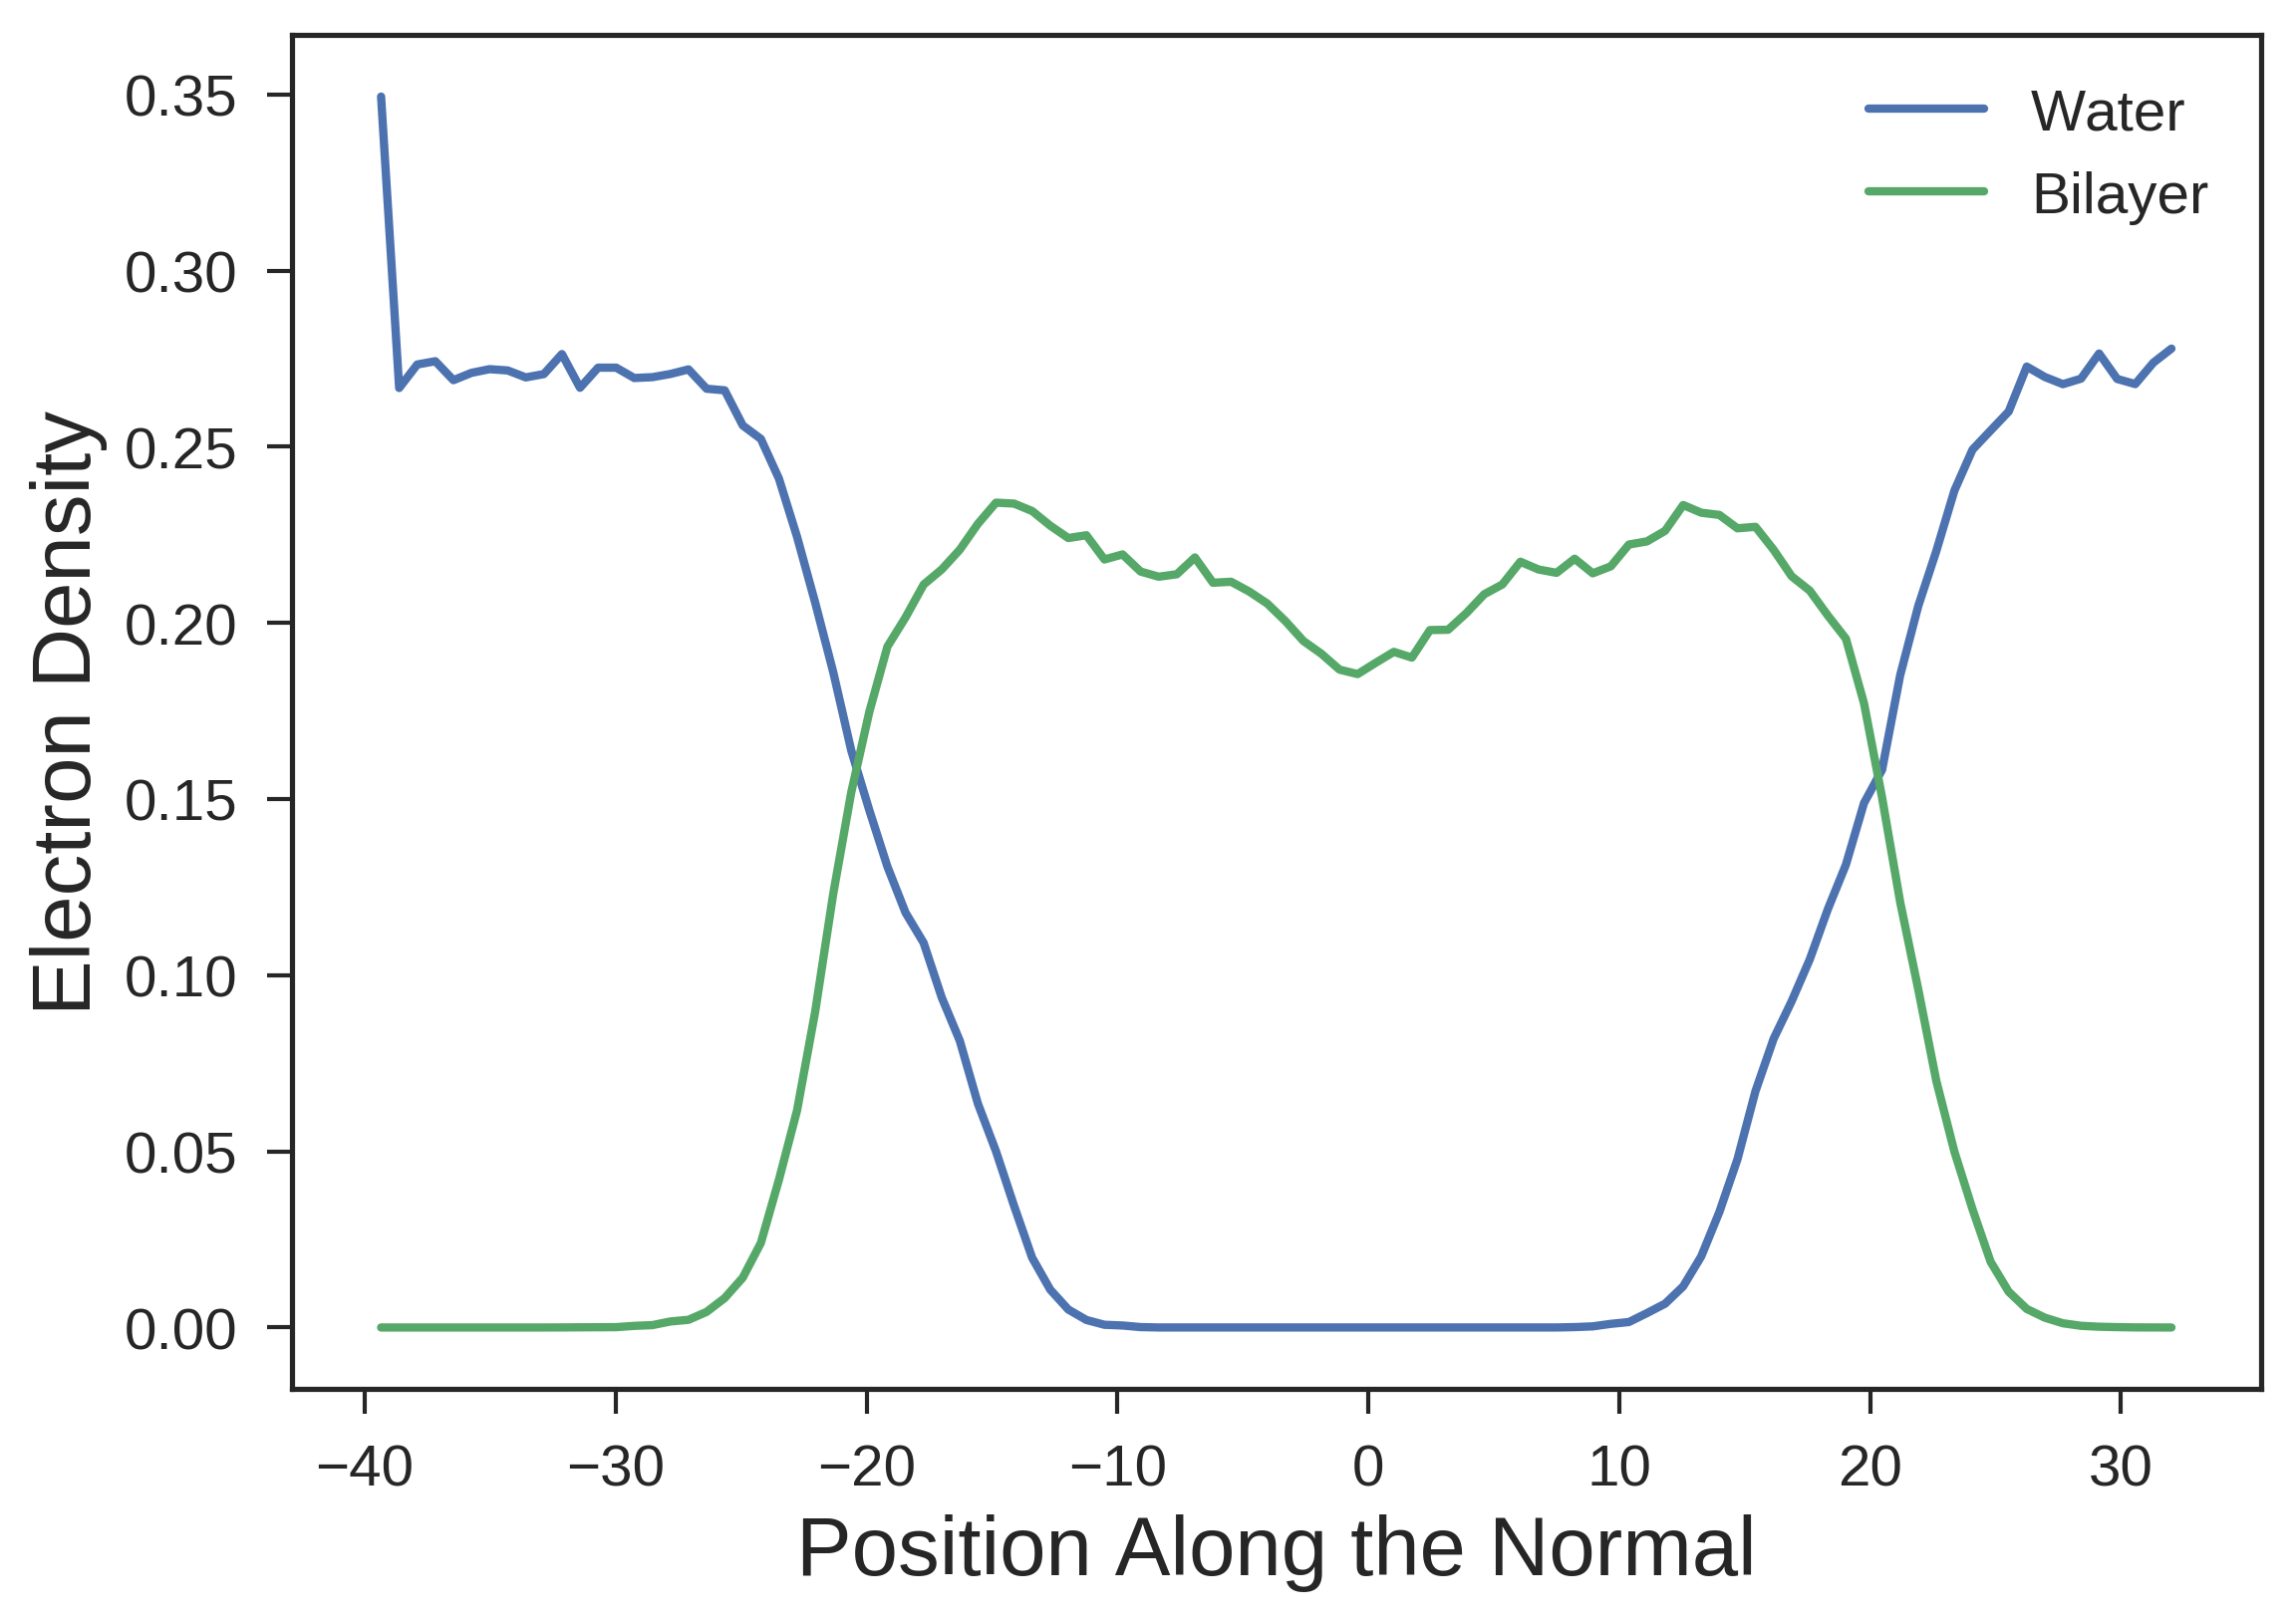

In [17]:
#Now let's plot the profile.
pgf.plot_density_profile([edens_prof_water, edens_prof_bilayer], save=False, show=True, label_list=['Water', 'Bilayer'], ylabel='Electron Density')

Okay, now let's do the same computations using the Gaussian version.

doing frame  0
doing frame  1
doing frame  2
doing frame  3
doing frame  4
doing frame  5
doing frame  6
doing frame  7
doing frame  8
doing frame  9
doing frame  0
doing frame  1
doing frame  2
doing frame  3
doing frame  4
doing frame  5
doing frame  6
doing frame  7
doing frame  8
doing frame  9


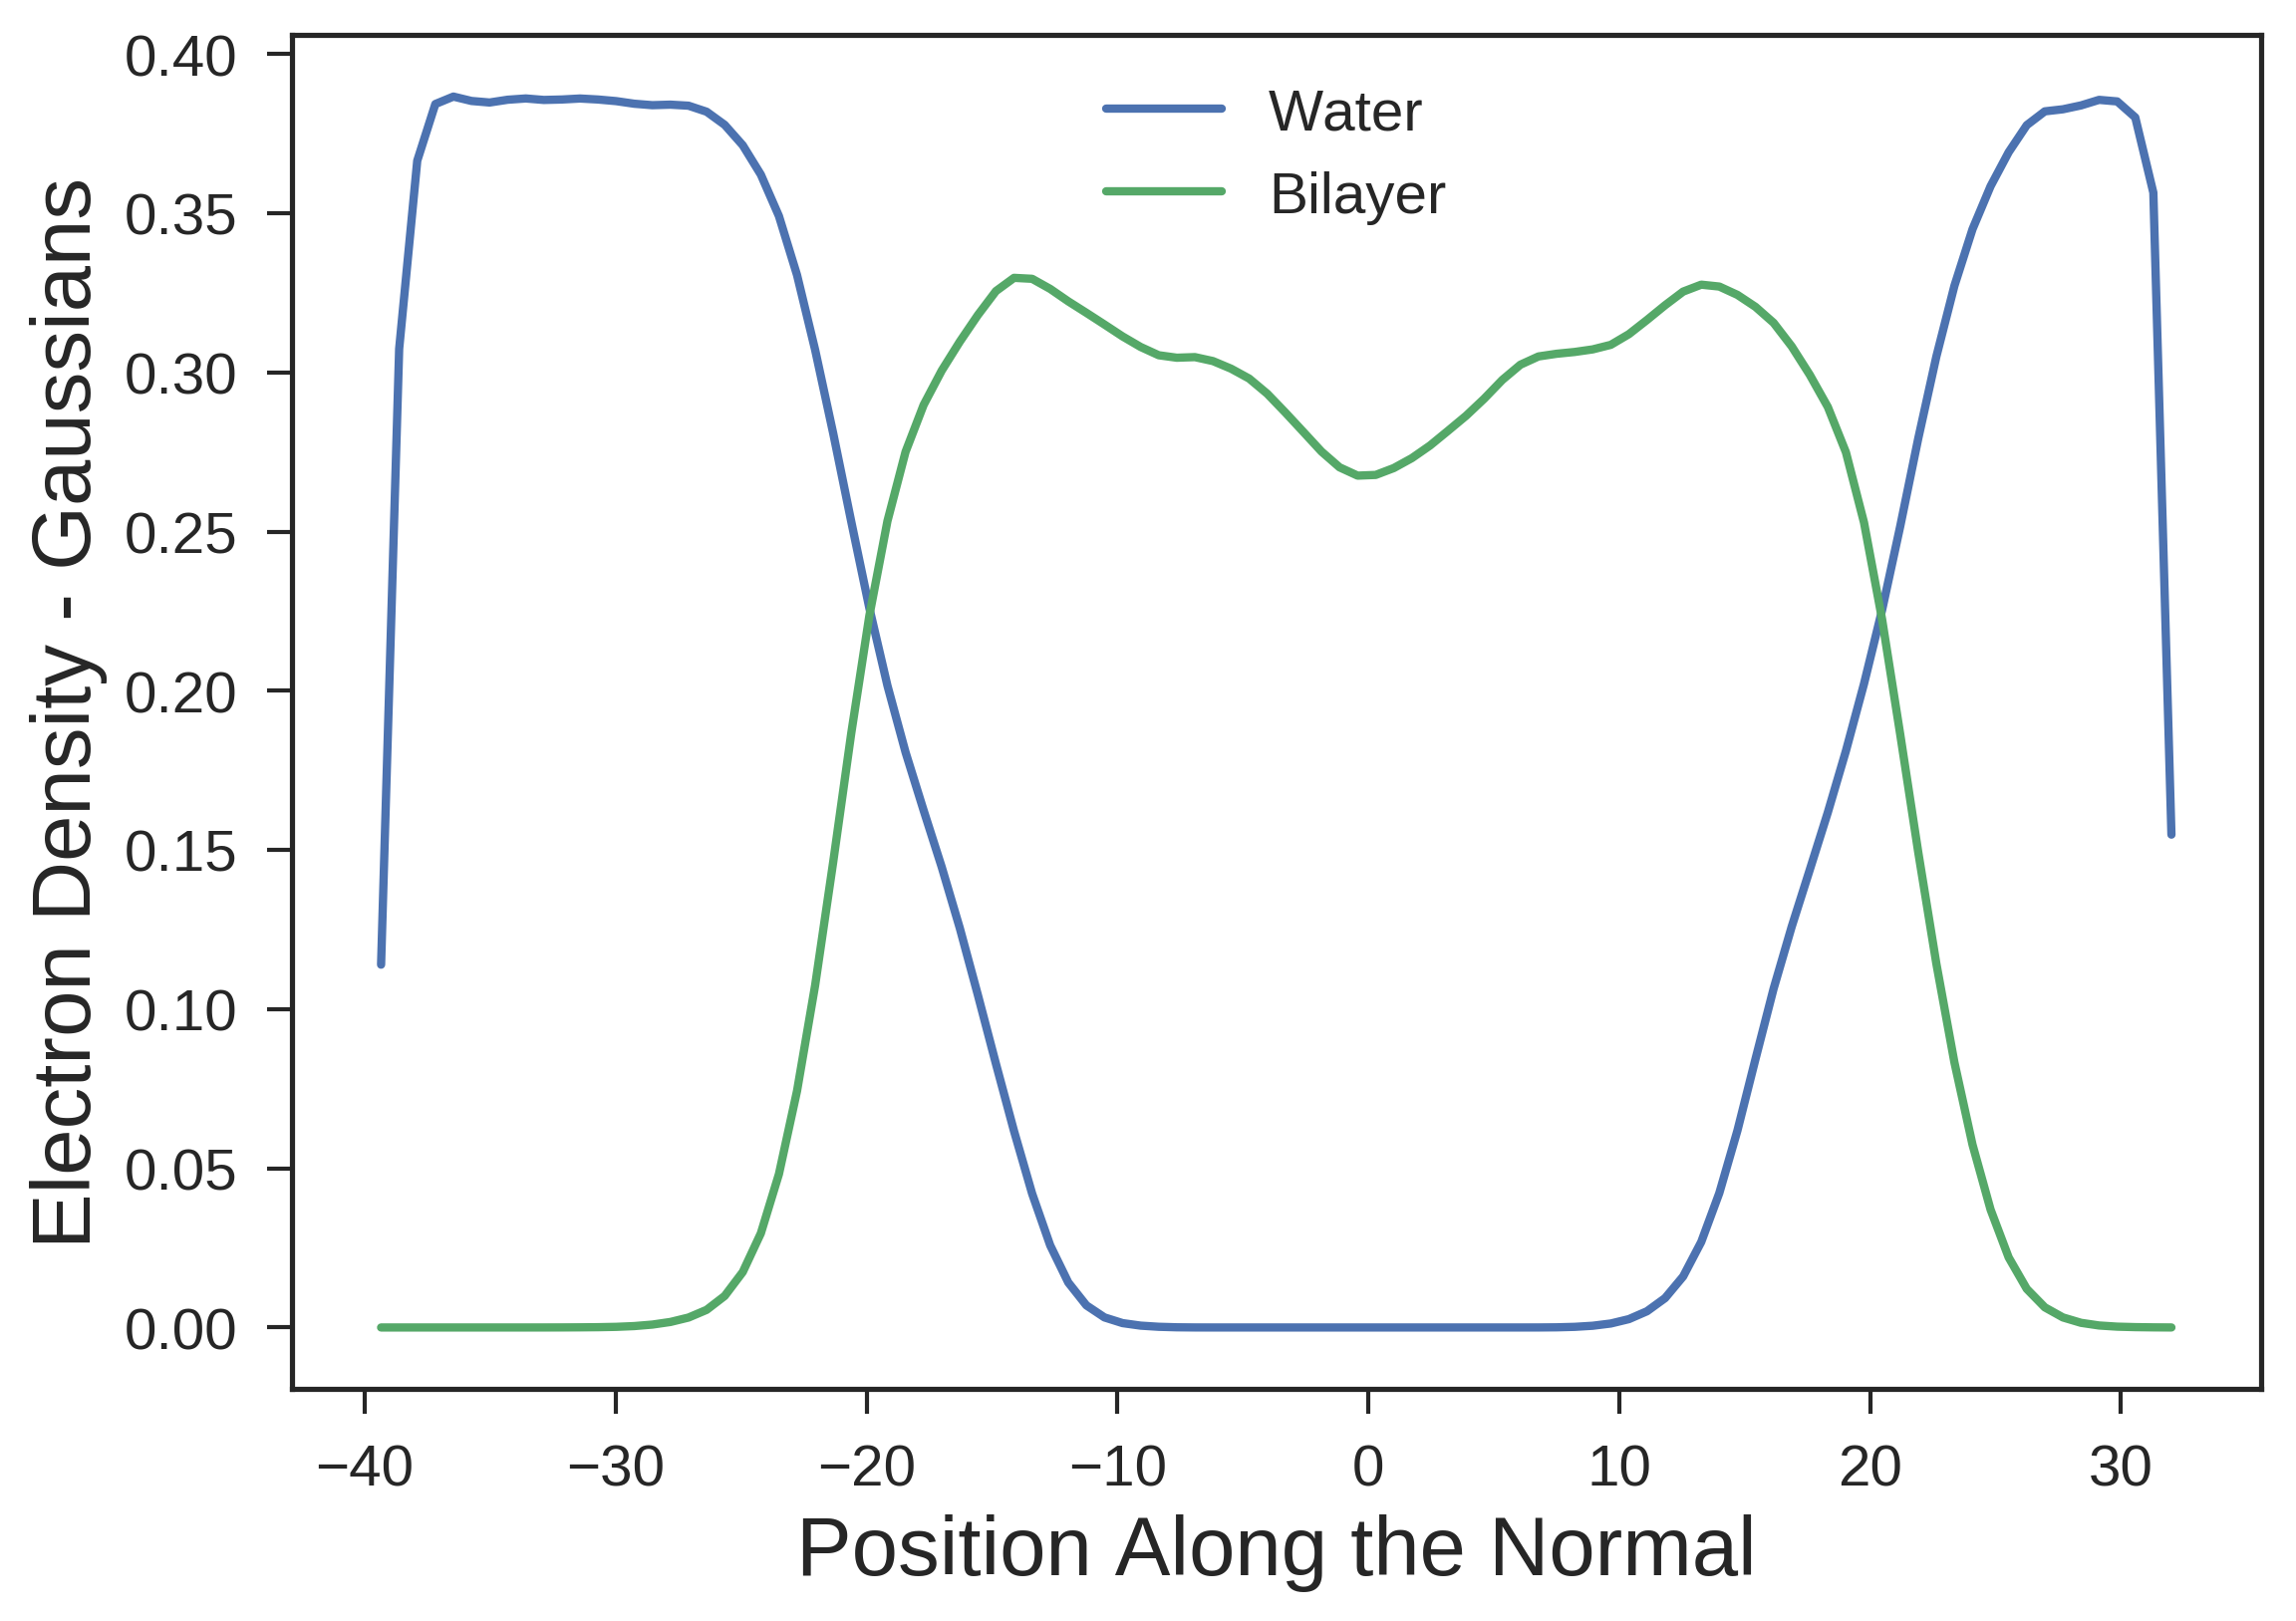

In [18]:
#Let's compute the point charge density for the bilayer.
edens_prof_bilayer_gauss = dp.electron_density_profile_gaussians(u.trajectory, bilayer, refsel=bilayer)
#Now water.
edens_prof_water_gauss = dp.electron_density_profile_gaussians(u.trajectory, water, refsel=bilayer)
#Now let's plot the profile.
pgf.plot_density_profile([edens_prof_water_gauss, edens_prof_bilayer_gauss], save=False, show=True, label_list=['Water', 'Bilayer'], ylabel='Electron Density - Gaussians')

Although it took quite a bit longer, we now have a nice smooth electron density profile. 